In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ts = pd.read_csv("/content/AirPassengers.csv")
ts.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
ts["Month"] = pd.to_datetime(ts["Month"], format="%Y-%m")
ts = ts.set_index("Month")
# Specify datetime frequency
#ts = ts.asfreq("M")
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


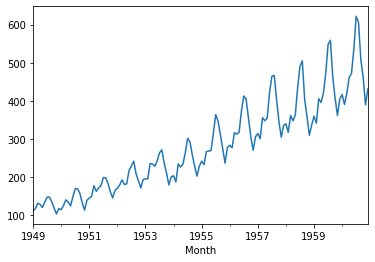

In [5]:
ts["#Passengers"].plot()

In [6]:
s_test = adfuller(ts["#Passengers"], autolag="AIC")
s_test

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [7]:
test_output = pd.Series(s_test[0:4], index=["Test statistic", "p-value", "#Lags Used", "Number of obs"])
print(test_output)

for key, value in s_test[4].items():
  print(f"Critical value ({key}) is {value}")

Test statistic      0.815369
p-value             0.991880
#Lags Used         13.000000
Number of obs     130.000000
dtype: float64
Critical value (1%) is -3.4816817173418295
Critical value (5%) is -2.8840418343195267
Critical value (10%) is -2.578770059171598


### How to make a series stationary

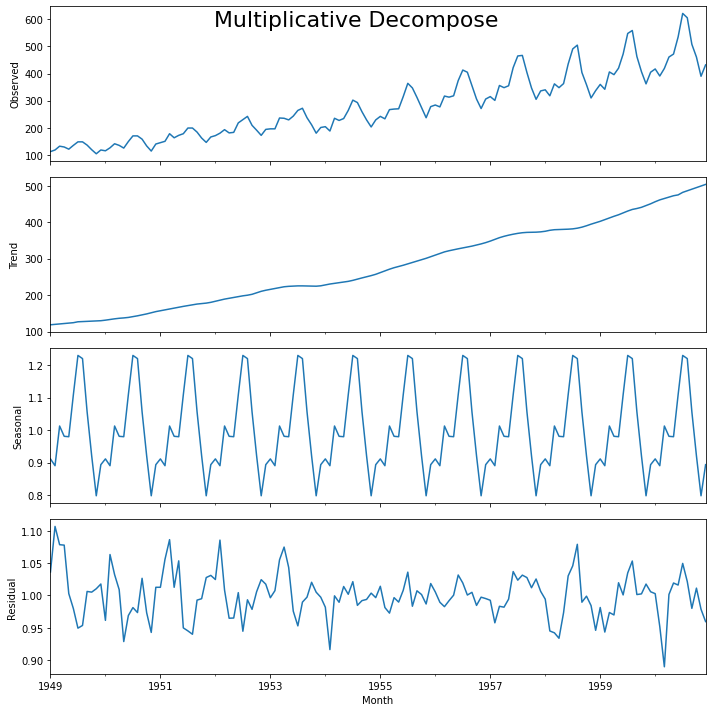

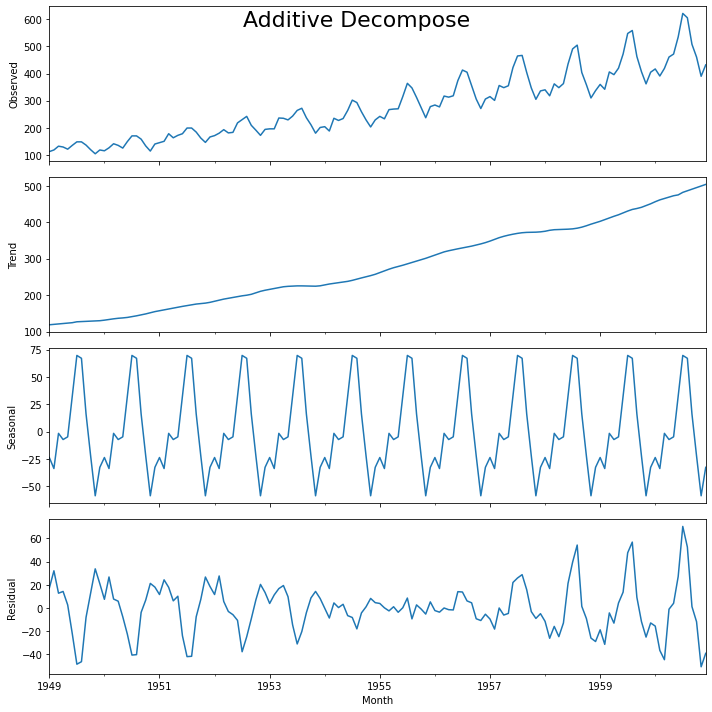

In [8]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(ts["#Passengers"], model="multiplicative", extrapolate_trend="freq")

# Additive Decomposition
result_add = seasonal_decompose(ts["#Passengers"], model="additive", extrapolate_trend="freq")

# Plot
plt.rcParams.update({"figure.figsize": (10, 10)})
result_mul.plot().suptitle("Multiplicative Decompose", fontsize=22)
result_add.plot().suptitle("Additive Decompose", fontsize=22)
plt.show()

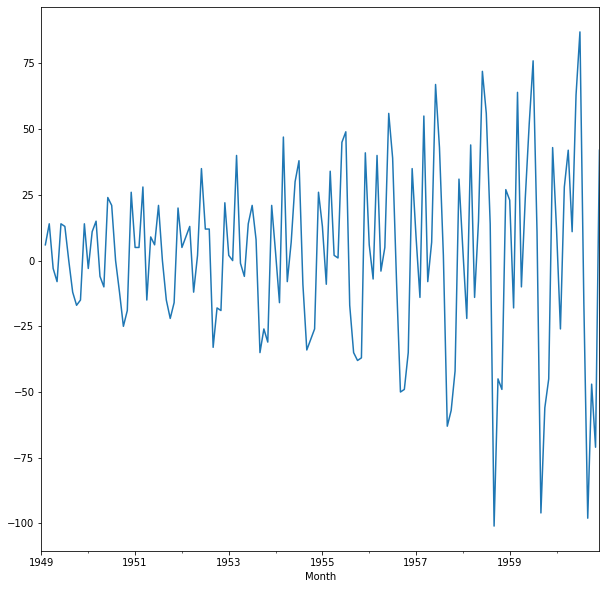

In [9]:
# Differencing:
# Y(t) = y(t) - y(t-1) 

ts["#Passengers_diff"] = ts["#Passengers"] - ts["#Passengers"].shift(1)
ts["#Passengers_diff"].plot()

In [10]:
s_test_1 = adfuller(ts["#Passengers_diff"].dropna(), autolag="AIC")
s_test_1

(-2.829266824169997,
 0.05421329028382577,
 12,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 988.5069317854085)

In [11]:
ts["#Passengers_diff"].isna().sum()

1

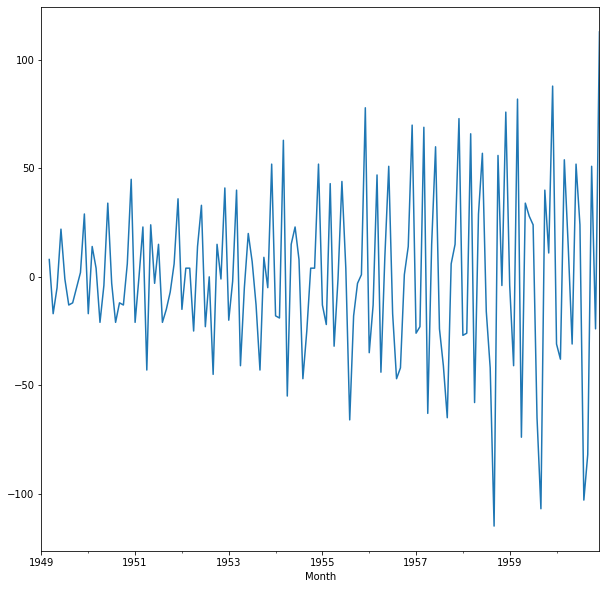

In [12]:
# 2nd time Differencing
ts["#Passengers_diff_2"] = ts["#Passengers_diff"] - ts["#Passengers_diff"].shift(1)
ts["#Passengers_diff_2"].plot()

In [13]:
s_test_2 = adfuller(ts["#Passengers_diff_2"].dropna(), autolag="AIC")
s_test_2

(-16.384231542468513,
 2.7328918500142026e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 988.6020417275599)

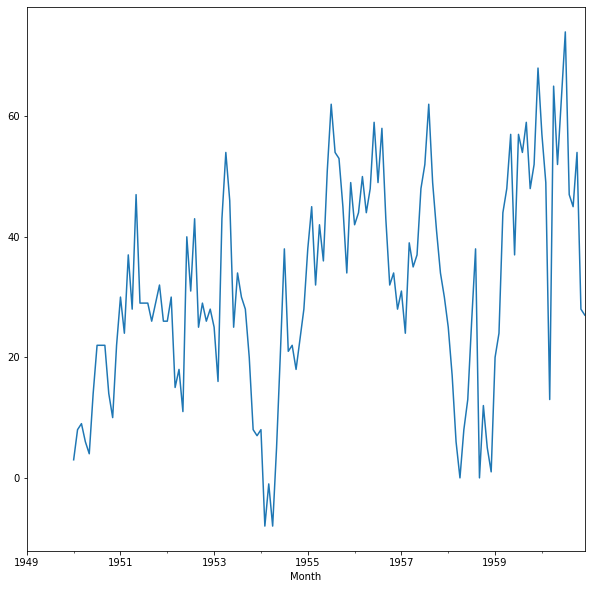

In [14]:
# Seasonal Differencing
# Y(t) = y(t) - y(t-k), k = seasonality

# Seasonality of 12

ts["#Passengers_sea_diff"] = ts["#Passengers"] - ts["#Passengers"].shift(12)
ts["#Passengers_sea_diff"].plot()

In [15]:
s_test_3 = adfuller(ts["#Passengers_sea_diff"].dropna(), autolag="AIC")
s_test_3

(-3.383020726492481,
 0.011551493085514952,
 1,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 919.527129208137)

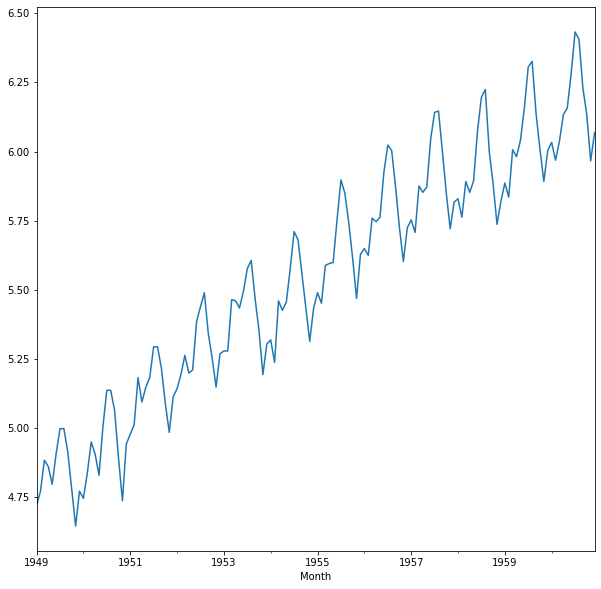

In [16]:
# Trasnformations

# Log
ts["#Passengers_log"] = np.log(ts["#Passengers"])
ts["#Passengers_log"].plot() 

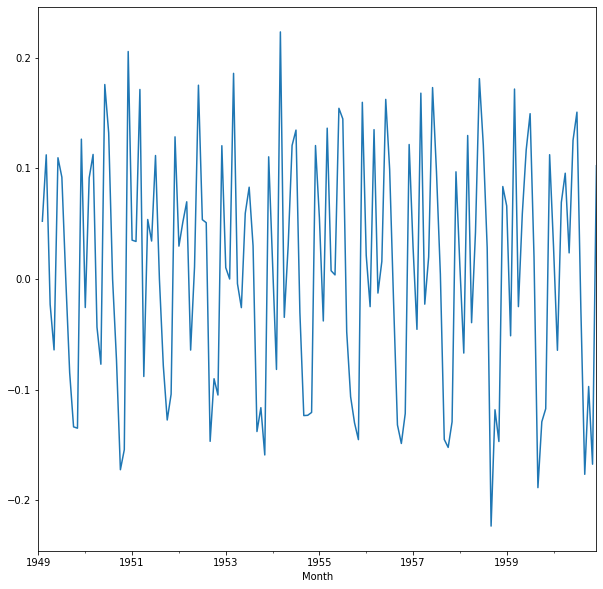

In [17]:
# Log with Differencing
ts["#Passengers_log"] = np.log(ts["#Passengers"])
ts["#Passengers_log_diff"] = ts["#Passengers_log"] - ts["#Passengers_log"].shift(1)
ts["#Passengers_log_diff"].plot() 

In [18]:
s_test_4 = adfuller(ts["#Passengers_log_diff"].dropna(), autolag="AIC")
s_test_4

(-2.7171305983881044,
 0.07112054815086355,
 14,
 128,
 {'1%': -3.4825006939887997,
  '10%': -2.578960197753906,
  '5%': -2.884397984161377},
 -440.35846985568105)

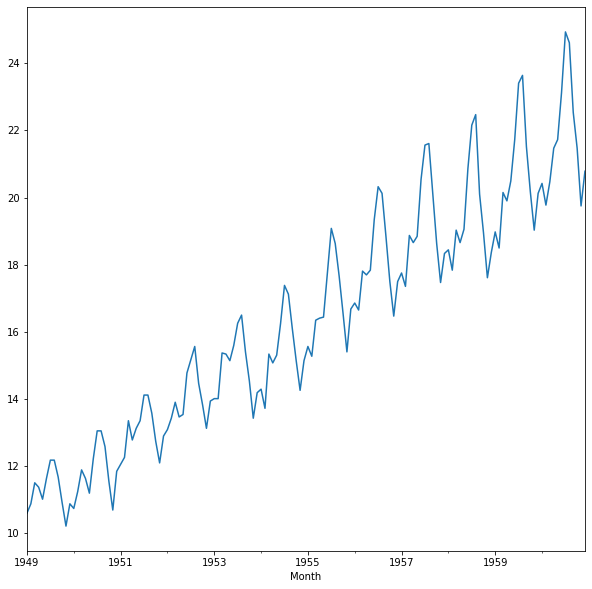

In [19]:
# Sqaure root
ts["#Passengers_sqrt"] = np.sqrt(ts["#Passengers"])
ts["#Passengers_sqrt"].plot() 

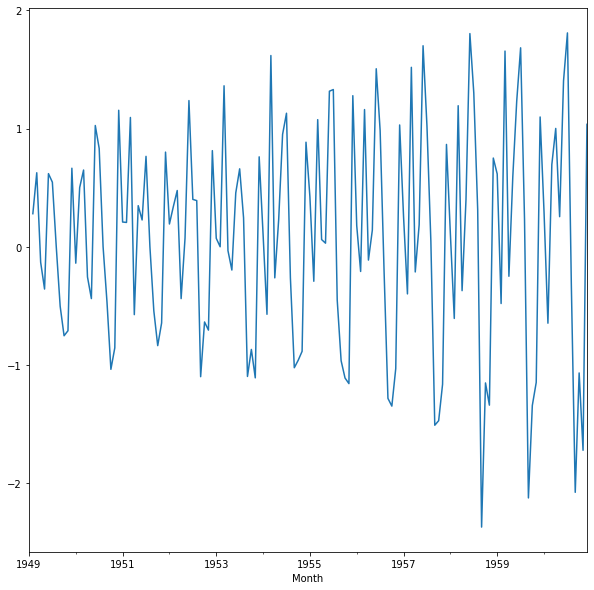

In [20]:
# Log with Differencing
ts["#Passengers_sqrt"] = np.sqrt(ts["#Passengers"])
ts["#Passengers_sqrt_diff"] = ts["#Passengers_sqrt"] - ts["#Passengers_sqrt"].shift(1)
ts["#Passengers_sqrt_diff"].plot() 

In [21]:
s_test_5 = adfuller(ts["#Passengers_sqrt_diff"].dropna(), autolag="AIC")
s_test_5

(-3.18642229116418,
 0.020784185571268942,
 12,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 84.47415786409971)

### How to detrend a time series

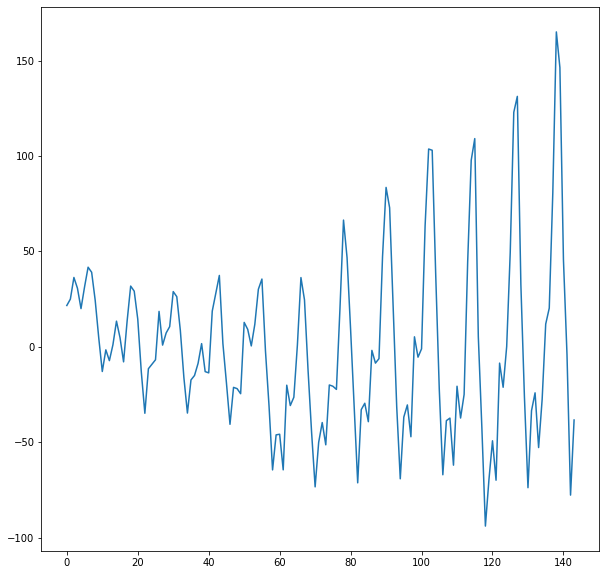

In [22]:
# Subtract the line of best fit
from scipy import signal

ts_detrended = signal.detrend((ts["#Passengers"]))
plt.plot(ts_detrended)

#### Subtract the Trend Component
Steps:
1. Seasonal Decomposition
2. Extract Trend 
3. Subtract trend from Original 
4. Plot

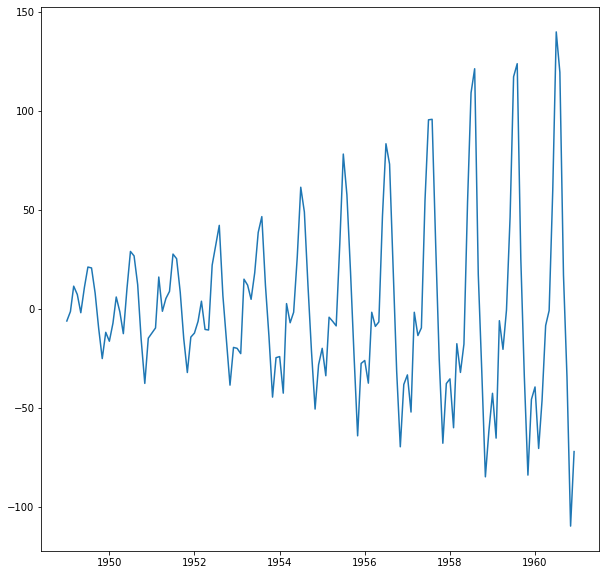

In [23]:
# Seasonal Decomposition: Extract Trend : Subtract trend from Original: Plot

# Additive Decomposition
result_add = seasonal_decompose(ts["#Passengers"], model="additive", extrapolate_trend=12)
trend = result_add.trend

ts_detrended_2 = ts["#Passengers"] - trend
plt.plot(ts_detrended_2)

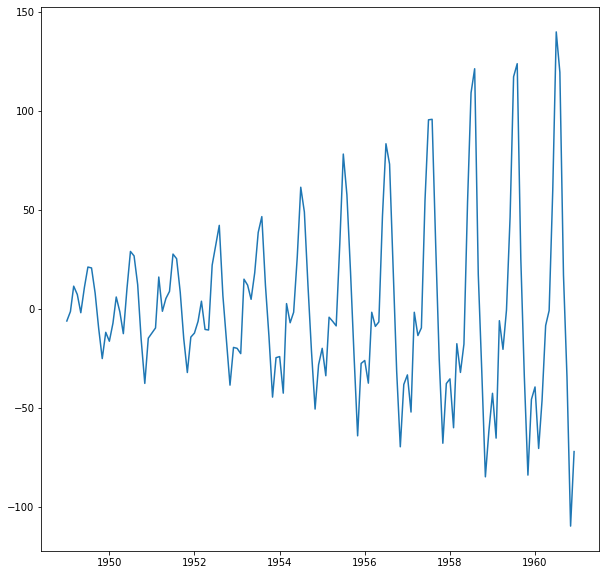

In [24]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(ts["#Passengers"], model="multiplicative", extrapolate_trend=12)
trend = result_mul.trend

ts_detrended_3 = ts["#Passengers"] - trend
plt.plot(ts_detrended_3)

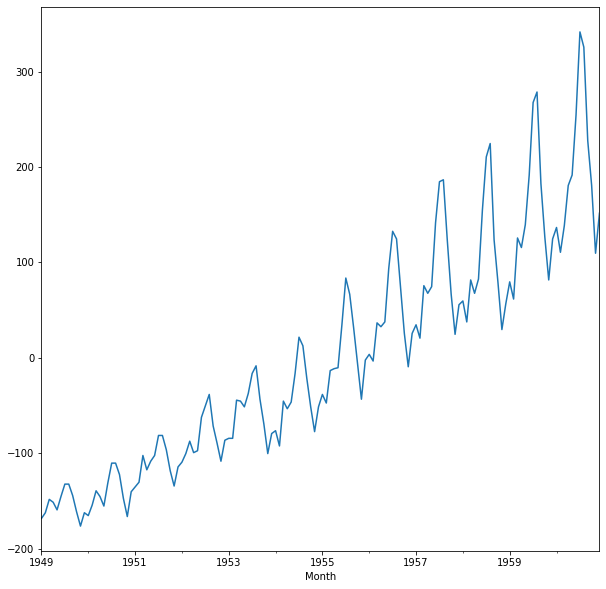

In [25]:
# Subtract the mean
ts["#Passengers_mean"] = np.mean(ts["#Passengers"])
ts["#Passengers_detrended"] = ts["#Passengers"] - ts["#Passengers_mean"]
ts["#Passengers_detrended"].plot() 

In [26]:
ts["#Passengers_mean"]

Month
1949-01-01    280.298611
1949-02-01    280.298611
1949-03-01    280.298611
1949-04-01    280.298611
1949-05-01    280.298611
                 ...    
1960-08-01    280.298611
1960-09-01    280.298611
1960-10-01    280.298611
1960-11-01    280.298611
1960-12-01    280.298611
Name: #Passengers_mean, Length: 144, dtype: float64

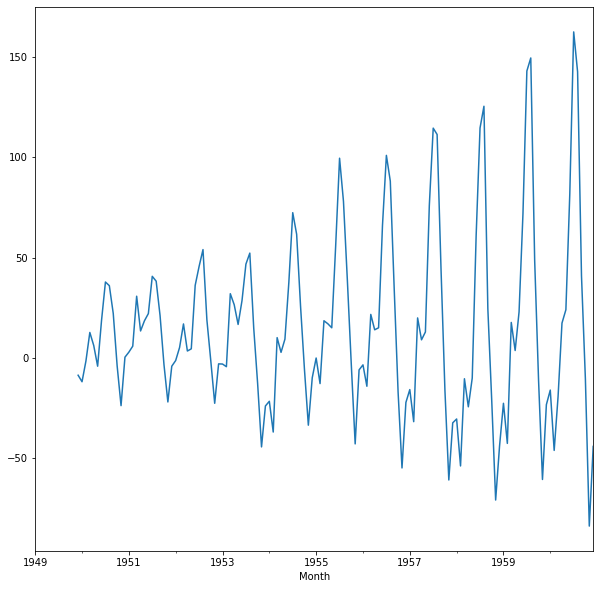

In [ ]:
# Subtract the rolling mean
ts["#Passengers_rolling_mean"] = ts["#Passengers"].rolling(window=12).mean()
ts["#Passengers_detrended_1"] = ts["#Passengers"] - ts["#Passengers_rolling_mean"]
ts["#Passengers_detrended_1"].plot() 

### How to deseasonalize (remove seasonality)
1. Take a moving average with length as the seasonal window. This will smoothen the series in the process
2. Seasonal difference the series (subtract the value of previous season from the current value)
3. Divide the series by the seasonal index obtained from STL decomposition

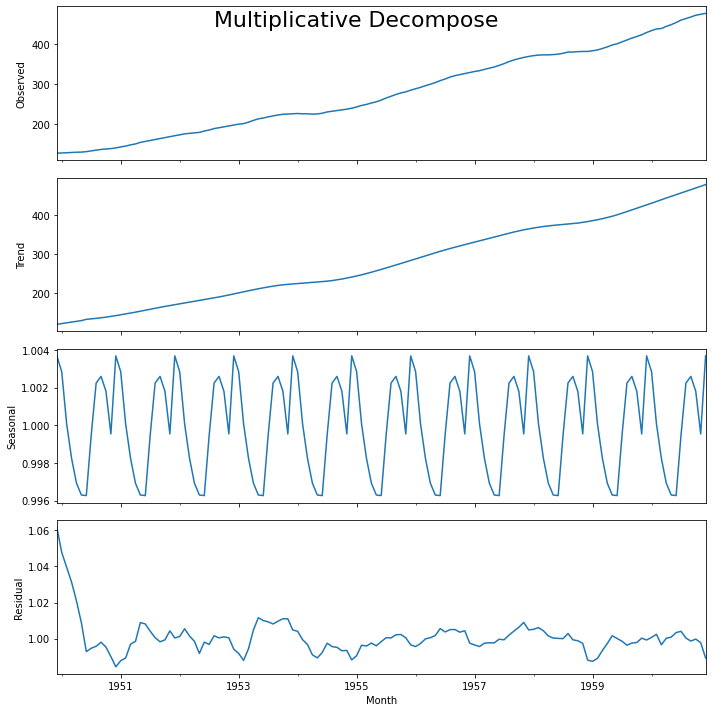

In [31]:
ts["#Passengers_rolling_mean"] = ts["#Passengers"].rolling(window=12).mean()

# # Multiplicative Decomposition
result_mul_2 = seasonal_decompose(ts["#Passengers_rolling_mean"].dropna(), model="multiplicative", extrapolate_trend="freq")
# # Plot
plt.rcParams.update({"figure.figsize": (10, 10)})
result_mul_2.plot().suptitle("Multiplicative Decompose", fontsize=22)
plt.show()